### A Simple Logistic Regression Problem

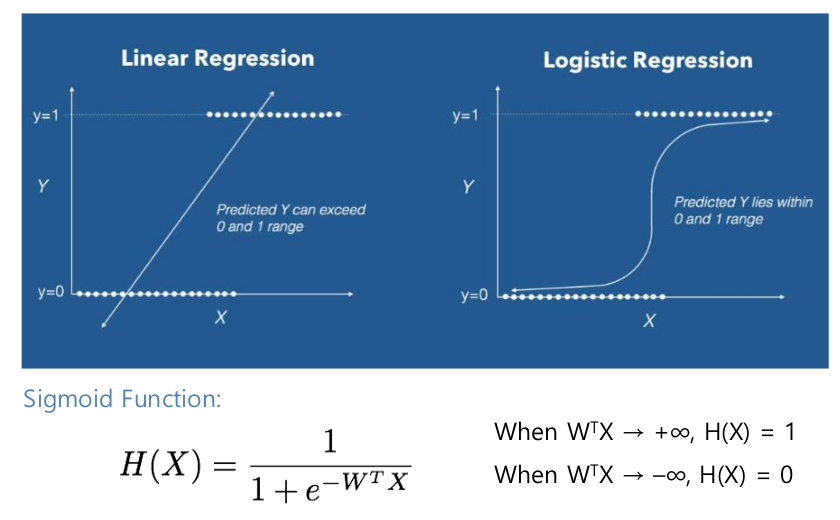

In [ ]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
tf.set_random_seed(777)  # for reproducibility
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W) + b))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                      tf.log(1 - hypothesis))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
# Accuracy computation
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y),dtype=tf.float32))

In [ ]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train_op], feed_dict={X: x_data, Y: y_data})
        if step % 500 == 0:
            print(step, cost_val)
    # Accuracy report
    h, p, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    comp = tf.stack([h, p], axis = 1).eval(session = sess).squeeze()
    print("\nCompare (Y_hat vs. Y):\n{}\nAccuracy: {}".format(np.around(comp,2), a))

0 1.7307833
500 0.48754048
1000 0.42857108
1500 0.39092335
2000 0.35999325
2500 0.33312953
3000 0.30948088
3500 0.28856292
4000 0.2699997
4500 0.25347143
5000 0.23870273
5500 0.22545671
6000 0.21353154
6500 0.20275462
7000 0.19297928
7500 0.18408059
8000 0.17595184
8500 0.16850184
9000 0.16165248
9500 0.1553364
10000 0.14949557

Compare (Y_hat vs. Y):
[[0.03 0.  ]
 [0.16 0.  ]
 [0.3  0.  ]
 [0.78 1.  ]
 [0.94 1.  ]
 [0.98 1.  ]]
Accuracy: 1.0


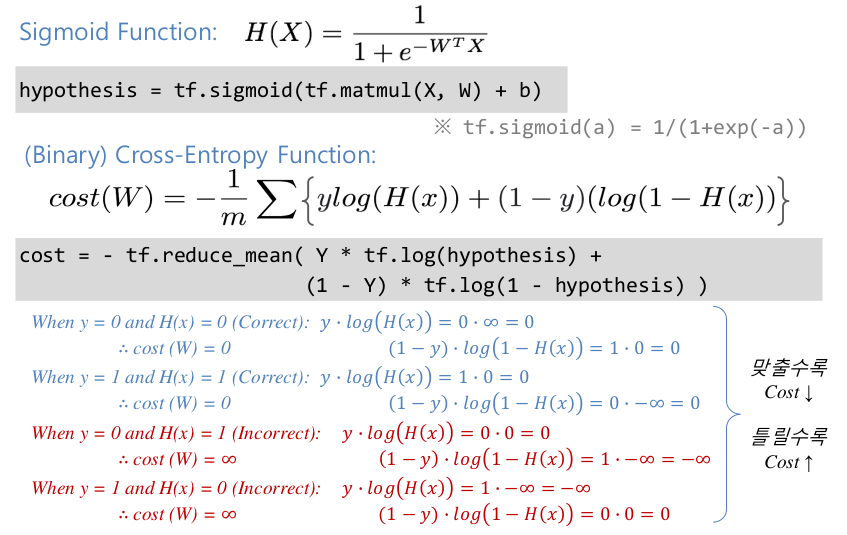

##당뇨병진단 (로지스틱)
Outcome = 1  당뇨병
Outcome = 0  정상 

In [ ]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
import pandas as pd
# diabetes.csv 파일 읽기
df = pd.read_csv('diabetes.csv', header=0, delimiter=",")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


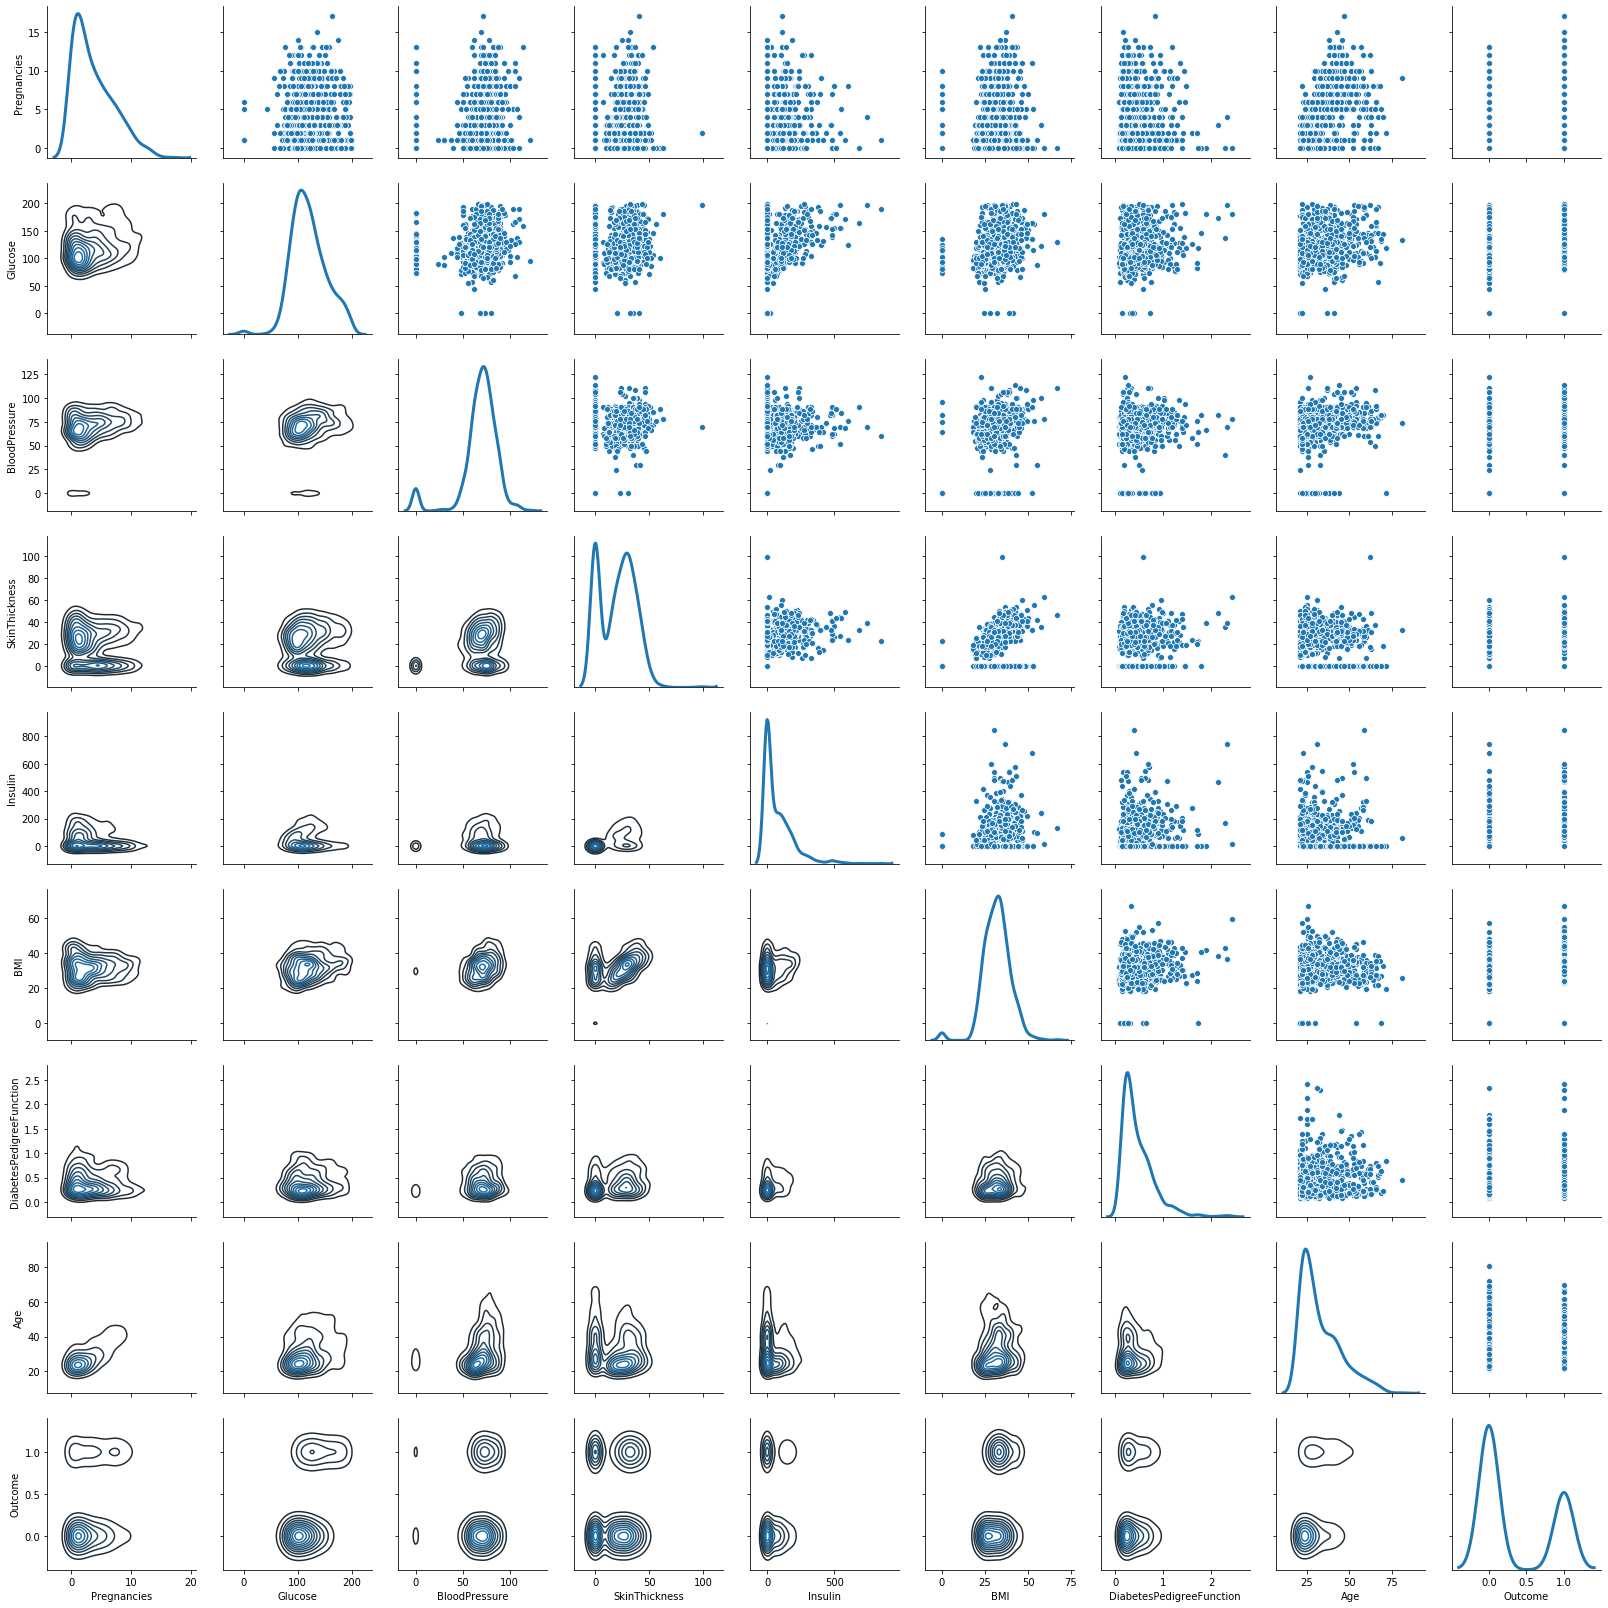

In [ ]:
%matplotlib inline
import seaborn as sns

g = sns.PairGrid(df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin",
                 "BMI","DiabetesPedigreeFunction","Age","Outcome"]], diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)

In [ ]:
'''
#filename: dataframe_to_dataset.py
#
def norm(x, _stat):
    return (x - _stat['mean']) / (3.0 * _stat['std'])

# Transform a dataframe to dataset
def df_to_dataset(dataframe, target_name, need_normalized=True, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop(target_name)
    if need_normalized:
        df_stat = dataframe.describe().transpose()
        dataframe = norm(dataframe, df_stat)
        #print(df_stat, dataframe) # run this if you want to see what df_stat looks like...
    labels = tf.reshape(labels, shape=[-1,1])
    dataset = tf.data.Dataset.from_tensor_slices((dataframe, labels))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(dataframe))
    dataset = dataset.batch(batch_size)
    return dataset
'''
print(__doc__)


#filename: dataframe_to_dataset.py
#
def norm(x, _stat):
    return (x - _stat['mean']) / (3.0 * _stat['std'])

# Transform a dataframe to dataset
def df_to_dataset(dataframe, target_name, need_normalized=True, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop(target_name)
    if need_normalized:
        df_stat = dataframe.describe().transpose()
        dataframe = norm(dataframe, df_stat)
        #print(df_stat, dataframe) # run this if you want to see what df_stat looks like...
    labels = tf.reshape(labels, shape=[-1,1])
    dataset = tf.data.Dataset.from_tensor_slices((dataframe, labels))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(dataframe))
    dataset = dataset.batch(batch_size)
    return dataset



In [ ]:
BATCH_SIZE = 16
STEPS_PER_EPOCHS = 48
EPOCHS = 1000

In [ ]:
from dataframe_to_dataset import df_to_dataset
# transform df to dataset
dataset = df_to_dataset(df, target_name = "Outcome", batch_size = BATCH_SIZE)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
labels = df.pop('Outcome')

In [ ]:
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [ ]:
# just for checking (run only one shot)
iter = dataset.make_one_shot_iterator() 
el = iter.get_next()
with tf.Session() as sess:
    x_data, y_data = sess.run(el)
    for x, y in zip (x_data, y_data):
        print("X={} Y={}".format(np.around(x,3),y))

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
X=[-0.38  -0.218  0.325  0.825  0.087  0.626  0.493 -0.064] Y=[0]
X=[ 0.411 -0.009  0.153 -0.429 -0.231 -0.296 -0.063  0.872] Y=[0]
X=[-0.183 -0.322 -0.157 -0.429 -0.231 -0.359 -0.283 -0.234] Y=[0]
X=[ 0.015  0.241  0.222  0.24  -0.231  0.275  0.083  0.107] Y=[1]
X=[-0.084  0.554 -0.191  0.031  0.33   0.038  0.122  0.078] Y=[1]
X=[-0.084 -0.489 -0.019  0.156 -0.101 -0.097 -0.18  -0.29 ] Y=[0]
X=[-0.084  0.543  0.222  0.574  1.114  0.271  1.675 -0.234] Y=[1]
X=[-0.281 -0.333 -0.053  0.051  0.041 -0.165 -0.307 -0.347] Y=[0]
X=[ 0.411 -0.27   0.05  -0.429 -0.231  0.203  0.013  0.673] Y=[0]
X=[ 0.015  0.658  0.153  0.386  0.57   0.212 -0.209 -0.064] Y=[1]
X=[-0.183 -0.218  0.015  0.657 -0.066  0.36   0.206 -0.234] Y=[0]
X=[ 0.114 -0.061  0.498

In [ ]:
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float64, shape=[None, 8])
Y = tf.placeholder(tf.float64, shape=[None, 1])
#tf.set_random_seed(777)  # activate this for reproducibility
W = tf.Variable(tf.random_normal([8, 1], dtype=tf.float64), name='weight')
b = tf.Variable(tf.random_normal([1], dtype=tf.float64), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(-tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float64)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float64))

# initialize iterator
iterator = dataset.make_initializable_iterator()
next_batch = iterator.get_next()

loss = 0; history = []
W_ = tf.placeholder(tf.float64, shape=[None, 8])
b_ = tf.placeholder(tf.float64, shape=[None, 1])
# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())   
    for ep in range(EPOCHS+1):
        sess.run(iterator.initializer)
        for step in range(STEPS_PER_EPOCHS):
            train_x, train_y= sess.run(next_batch) 
            loss, _, W_, b_  = sess.run([cost, train_op, W, b], 
                                        feed_dict={X: train_x, Y: train_y})
        history.append(loss)
        if ep % 50 == 0:
            print('Epoch: {:3d}, Loss = {}'.format(ep, loss))

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.
Epoch:   0, Loss = 0.4994659909341329
Epoch:  50, Loss = 0.32558545235273706
Epoch: 100, Loss = 0.3253876193511629
Epoch: 150, Loss = 0.32398149911405605
Epoch: 200, Loss = 0.3209874891824672
Epoch: 250, Loss = 0.3175684430474066
Epoch: 300, Loss = 0.31428021850460286
Epoch: 350, Loss = 0.31132487289161415
Epoch: 400, Loss = 0.30874791263821
Epoch: 450, Loss = 0.30653289594432886
Epoch: 500, Loss = 0.30464227584107134
Epoch: 550, Loss = 0.30303412362910853
Epoch: 600, Loss = 0.3016685656257634
Epoch: 650, Loss = 0.3005099415524855
Epoch: 700, Loss = 0.29952722886975264
Epoch: 750, Loss = 0.2986937993742924
Epoch: 800, Loss = 0.2979869512515578
Epoch: 850, Loss = 0.2973873976094179
Epoch: 900, Loss = 0.2968787821077471
Epoch: 950, Loss

In [ ]:
# Accuracy report
print("accuracy checking...")
d_val = tf.placeholder(tf.float64, shape=[None, 1])
p_val = tf.placeholder(tf.float64, shape=[None, 1])
a_val = 0.0
with tf.Session() as sess:
    sess.run(iterator.initializer)
    for step in range(int(STEPS_PER_EPOCHS/6)):
        t_x, t_y = sess.run(next_batch) 
        h, p, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: t_x, Y: t_y, W: W_, b: b_})  
        if step == 0:
            p_val = p; d_val = t_y - p
            next
        d_val = tf.concat([d_val, t_y - p], 0).eval(session=sess)
        p_val = tf.concat([p_val, p], 0).eval(session=sess)
        a_val += a
        print("Batch Index = {:3d} : Accuracy of this batch = {:4f}".format(step, a))
    a_val = a_val / STEPS_PER_EPOCHS * 6.0
    comp = tf.stack([p_val+d_val, p_val, d_val], axis = 1).eval(session = sess).squeeze()
    print("\nCompare (Y_hat vs. Y):\n{}\nAccuracy: {}".format(np.around(comp,2), a_val))

accuracy checking...
Batch Index =   0 : Accuracy of this batch = 1.000000
Batch Index =   1 : Accuracy of this batch = 0.812500
Batch Index =   2 : Accuracy of this batch = 0.750000
Batch Index =   3 : Accuracy of this batch = 0.875000
Batch Index =   4 : Accuracy of this batch = 0.625000
Batch Index =   5 : Accuracy of this batch = 0.687500
Batch Index =   6 : Accuracy of this batch = 0.687500
Batch Index =   7 : Accuracy of this batch = 1.000000

Compare (Y_hat vs. Y):
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 0.  0.  0.]
 [ 1.  1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  1.  0.]
 [ 0.  0.  0.]
 [ 1.  1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 0.  0.  0.]
 [ 1.  1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  1.  0.]
 [ 0.  0.  0.]
 [ 1.  1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  0.  1.]
 [ 0.  0.  0.

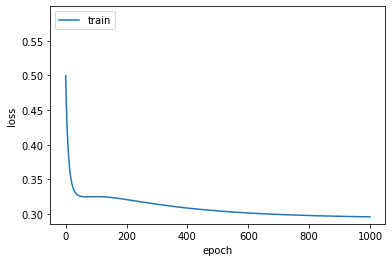

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 

plt.plot(history)
plt.ylim(np.min(history)-0.01, np.max(history)+0.1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'], loc='upper left')
plt.show()

C:\Users\gaeasoft\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  after removing the cwd from sys.path.


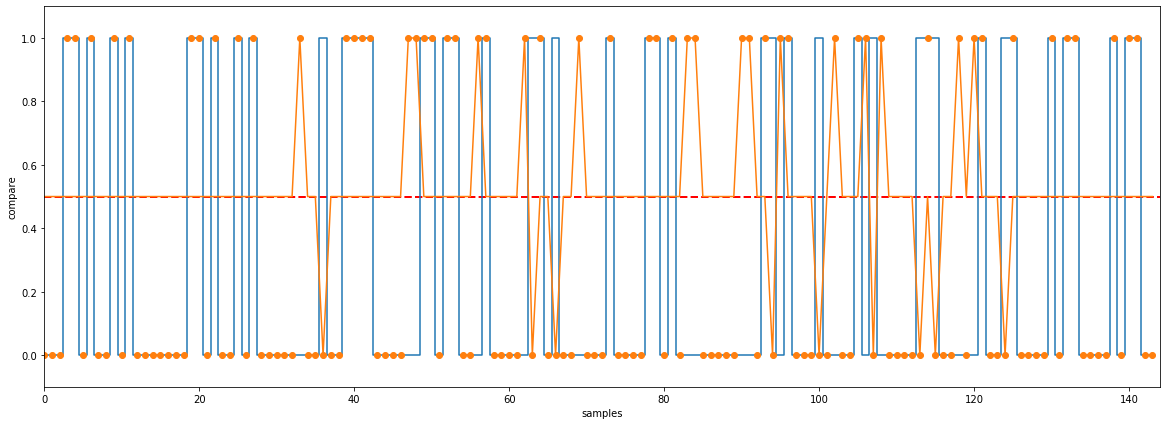

In [ ]:
plt.figure(figsize=(20,7))
xmax = p_val.shape[0]
plt.plot([0,xmax],[0.5,0.5],'r--',lw=2)
plt.plot(p_val, linestyle="steps-mid")
plt.plot(p_val+d_val, 'o')
plt.plot(d_val/2+0.5, 'tab:orange')
plt.xlim(0, xmax)
plt.ylim(-0.1, 1.1)
plt.xlabel('samples')
plt.ylabel('compare')
plt.show()

### Softmax & Cross-Entropy

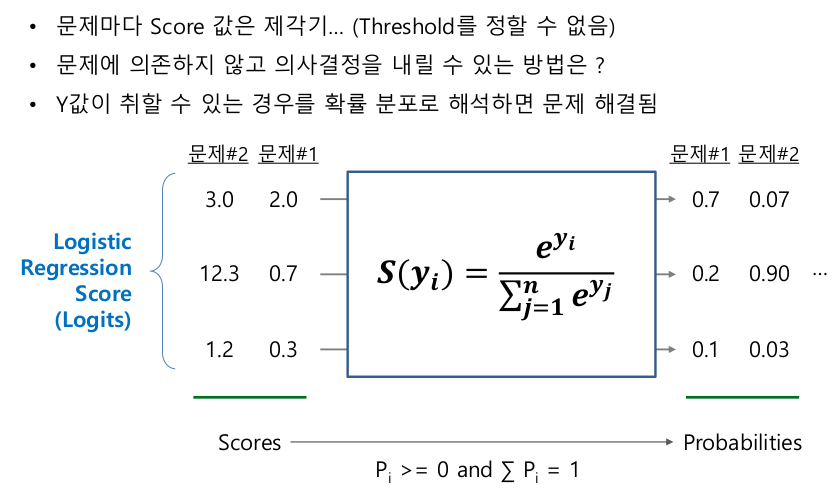

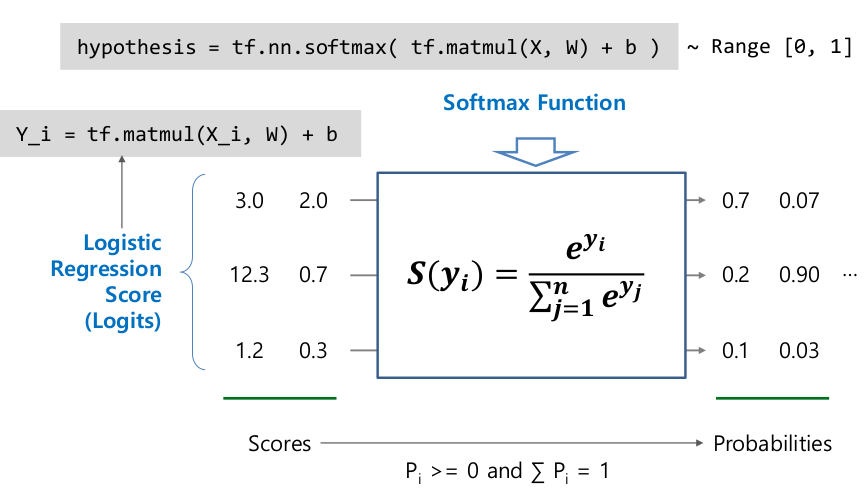

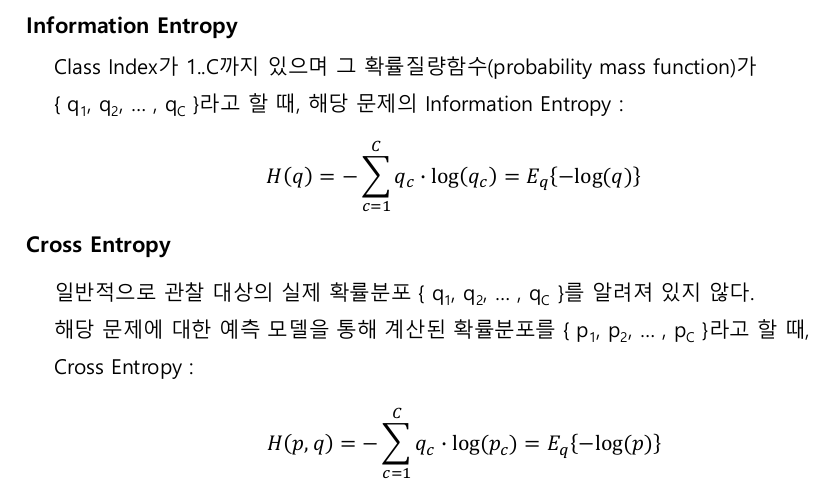

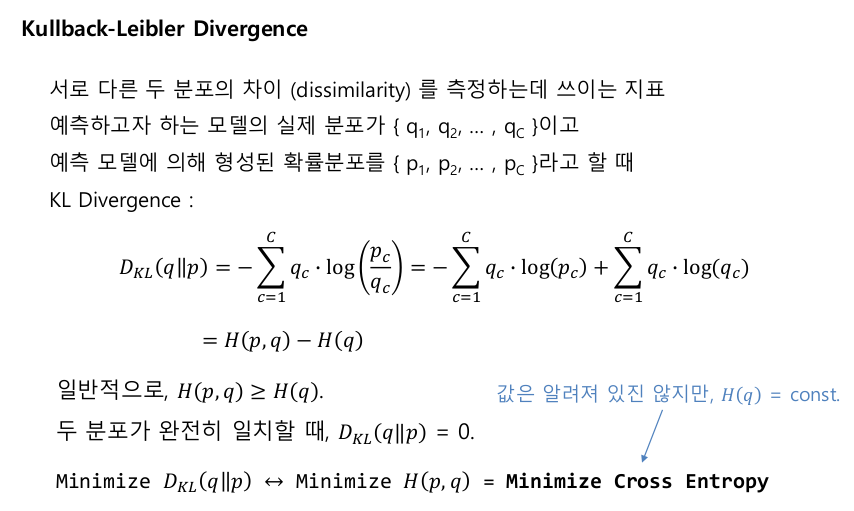

In [ ]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], 
          [1, 7, 5, 5], [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], 
          [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch graph
W_ = tf.placeholder(tf.float64, shape=[None, 1])
b_ = tf.placeholder(tf.float64, shape=[None, 1])
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        W_, b_, _ = sess.run([W, b, optimizer], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

0 5.6762867
200 0.56329674
400 0.45593607
600 0.3788856
800 0.30820438
1000 0.2395985
1200 0.21407385
1400 0.19535288
1600 0.17956206
1800 0.16606525
2000 0.15440142


In [ ]:
# Testing & One-hot encoding
with tf.Session() as sess:
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]], W: W_, b: b_})
    print(a, sess.run(tf.arg_max(a, 1)))

[[3.6753339e-03 9.9631304e-01 1.1650338e-05]] [1]


In [ ]:
# Testing & One-hot encoding
with tf.Session() as sess:
    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], 
                                              [1, 3, 4, 3], 
                                              [1, 1, 0, 1]], W: W_, b: b_})
    print(all, sess.run(tf.arg_max(all, 1)))

[[3.67533392e-03 9.96313035e-01 1.16503379e-05]
 [8.76811326e-01 1.02936655e-01 2.02520490e-02]
 [1.61229288e-08 3.52486823e-04 9.99647498e-01]] [1 0 2]


In [ ]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

nb_classes = 3
x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], 
          [1, 7, 5, 5], [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], 
          [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# define Logits
logits = tf.matmul(X, W) + b

# Softmax Cross-entropy cost with logits
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y)
cost = tf.reduce_mean( cost_i )
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch graph
W_ = tf.placeholder(tf.float64, shape=[None, 1])
b_ = tf.placeholder(tf.float64, shape=[None, 1])
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        W_, b_, _ = sess.run([W, b, optimizer], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

0 2.733705
200 0.52576256
400 0.4299524
600 0.3546096
800 0.28131312
1000 0.23263651
1200 0.21074405
1400 0.19253302
1600 0.17713724
1800 0.16395307
2000 0.15254074


### Zoo Classification Problem

In [ ]:
import pandas as pd
# Admission_Predict.csv 읽기
df = pd.read_csv('zoo.csv', header=0, delimiter=",")

In [ ]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


In [ ]:
Y_label = df.pop('type')
df = df * 1

In [ ]:
Y_label.head()

0    mammal
1    mammal
2      fish
3    mammal
4    mammal
Name: type, dtype: object

In [ ]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [ ]:
from sklearn.preprocessing import label_binarize
# Binarize the output
Y = label_binarize(Y_label, classes=['insect', 'fish', 'amphibian','reptile', 'bird', 'mammal', 'mollusc.et.al'])

In [ ]:
Y[:10]

array([[0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0]])

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((df, Y))

In [ ]:
SHUFFLE_SIZE = len(df)
BATCH_SIZE = 10
dataset = dataset.shuffle(buffer_size=SHUFFLE_SIZE)
dataset = dataset.batch(batch_size=BATCH_SIZE)

In [ ]:
# just for checking (run only one shot)
iter = dataset.make_one_shot_iterator() 
el = iter.get_next()
with tf.Session() as sess:
    x_data, y_data = sess.run(el)
    for x, y in zip (x_data, y_data):
        print("X={} Y={}".format(x,y))

X=[1 0 1 1 0 1 1 0 1 1 0 0 4 1 0 1] Y=[0 0 0 0 0 1 0]
X=[1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1] Y=[0 0 0 0 0 1 0]
X=[1 0 0 1 0 1 1 1 1 1 0 1 2 1 0 1] Y=[0 0 0 0 0 1 0]
X=[1 0 1 0 1 0 0 0 0 1 0 0 6 0 0 0] Y=[1 0 0 0 0 0 0]
X=[0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0] Y=[0 1 0 0 0 0 0]
X=[0 0 1 0 0 1 0 1 1 1 0 0 4 0 0 0] Y=[0 0 1 0 0 0 0]
X=[0 1 1 0 1 1 1 0 1 1 0 0 2 1 0 0] Y=[0 0 0 0 1 0 0]
X=[1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1] Y=[0 0 0 0 0 1 0]
X=[0 1 1 0 1 1 0 0 1 1 0 0 2 1 0 0] Y=[0 0 0 0 1 0 0]
X=[0 1 1 0 1 0 1 0 1 1 0 0 2 1 0 1] Y=[0 0 0 0 1 0 0]


In [ ]:
nb_classes = 7  # 0 ~ 6
X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, nb_classes])  # 0 ~ 6
W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# define the logits for softmax
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# Softmax Cross-entropy Cost (=Loss)
cost_i = tf.nn.softmax_cross_entropy_with_logits(
               logits=logits, labels=Y)
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
# initialize iterator
iterator = dataset.make_initializable_iterator()
next_batch = iterator.get_next()

loss = 0; acc = 0; history = []
W_ = tf.placeholder(tf.float64, shape=[None, 1])
b_ = tf.placeholder(tf.float64, shape=[None, 1])
STEPS_PER_EPOCHS = 10
EPOCHS = 200
# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())   
    for ep in range(EPOCHS+1):
        sess.run(iterator.initializer)
        for step in range(STEPS_PER_EPOCHS):
            train_x, train_y= sess.run(next_batch) 
            loss, acc, _, W_, b_  = sess.run([cost, accuracy, train_op, W, b], 
                                        feed_dict={X: train_x, Y: train_y})
        history.append(loss)
        if ep % 10 == 0:
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(ep, loss, acc))

    # Let's see if we can predict
    sess.run(iterator.initializer)
    for step in range(2):
        x_data, y_data= sess.run(next_batch)
        pred = sess.run(prediction, feed_dict={X: x_data})
        expt = tf.argmax(y_data, 1).eval(session=sess)
        for p, y in zip(pred, expt):
            print("[{}] Prediction: {} True Y: {}".format(p == y, p, y))

Step:     0	Loss: 4.304	Acc: 40.00%
Step:    10	Loss: 0.475	Acc: 80.00%
Step:    20	Loss: 0.538	Acc: 90.00%
Step:    30	Loss: 0.371	Acc: 90.00%
Step:    40	Loss: 0.431	Acc: 90.00%
Step:    50	Loss: 0.046	Acc: 100.00%
Step:    60	Loss: 0.334	Acc: 100.00%
Step:    70	Loss: 0.172	Acc: 100.00%
Step:    80	Loss: 0.245	Acc: 90.00%
Step:    90	Loss: 0.081	Acc: 100.00%
Step:   100	Loss: 0.183	Acc: 90.00%
Step:   110	Loss: 0.095	Acc: 100.00%
Step:   120	Loss: 0.163	Acc: 100.00%
Step:   130	Loss: 0.154	Acc: 100.00%
Step:   140	Loss: 0.126	Acc: 100.00%
Step:   150	Loss: 0.049	Acc: 100.00%
Step:   160	Loss: 0.075	Acc: 100.00%
Step:   170	Loss: 0.136	Acc: 100.00%
Step:   180	Loss: 0.070	Acc: 100.00%
Step:   190	Loss: 0.091	Acc: 100.00%
Step:   200	Loss: 0.065	Acc: 100.00%
[True] Prediction: 4 True Y: 4
[True] Prediction: 5 True Y: 5
[True] Prediction: 4 True Y: 4
[True] Prediction: 5 True Y: 5
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 6 True Y: 6
[True] Predic

### Nonlinear XOR Problem

In [ ]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        loss, _, w_ = sess.run([cost, train, W], feed_dict={X: x_data, Y: y_data})
        #_w = tf.squeeze(w_)
        if step % 200 == 0:
            print("Step={:4d} : Lose={:.4f}, Weight={}".format(step, loss, w_.T))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

Step=   0 : Lose=1.1004, Weight=[[-1.7918394   0.16811348]]
Step= 200 : Lose=0.6994, Weight=[[-0.3801647   0.22991173]]
Step= 400 : Lose=0.6937, Weight=[[-0.12149885  0.05323802]]
Step= 600 : Lose=0.6932, Weight=[[-0.04049247  0.00938952]]
Step= 800 : Lose=0.6932, Weight=[[-1.4202955e-02  3.2899414e-05]]
Step=1000 : Lose=0.6931, Weight=[[-0.00525912 -0.00119644]]
Step=1200 : Lose=0.6931, Weight=[[-0.0020502 -0.0008908]]
Step=1400 : Lose=0.6931, Weight=[[-0.00083535 -0.00050447]]
Step=1600 : Lose=0.6931, Weight=[[-0.0003524  -0.00025797]]
Step=1800 : Lose=0.6931, Weight=[[-0.00015251 -0.00012558]]
Step=2000 : Lose=0.6931, Weight=[[-6.7184126e-05 -5.9500249e-05]]
Step=2200 : Lose=0.6931, Weight=[[-2.9940174e-05 -2.7750335e-05]]
Step=2400 : Lose=0.6931, Weight=[[-1.3441608e-05 -1.2822344e-05]]
Step=2600 : Lose=0.6931, Weight=[[-6.0655243e-06 -5.8858582e-06]]
Step=2800 : Lose=0.6931, Weight=[[-2.7276662e-06 -2.6865778e-06]]
Step=3000 : Lose=0.6931, Weight=[[-1.2524432e-06 -1.2486090e-06]]


In [ ]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Multiple Layered Perceptron
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
L1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(L1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(6001):
        loss, _, w_ = sess.run([cost, train, W], feed_dict={X: x_data, Y: y_data})
        #_w = tf.squeeze(w_)
        if step % 200 == 0:
            print("Step={:4d} : Lose={:.4f}, Weight={}".format(step, loss, w_.T))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

Step=   0 : Lose=0.7027, Weight=[[ 0.08071046 -0.5786412 ]]
Step= 200 : Lose=0.6951, Weight=[[ 0.08071046 -0.5786412 ]]
Step= 400 : Lose=0.6936, Weight=[[ 0.08071046 -0.5786412 ]]
Step= 600 : Lose=0.6925, Weight=[[ 0.08071046 -0.5786412 ]]
Step= 800 : Lose=0.6914, Weight=[[ 0.08071046 -0.5786412 ]]
Step=1000 : Lose=0.6901, Weight=[[ 0.08071046 -0.5786412 ]]
Step=1200 : Lose=0.6882, Weight=[[ 0.08071046 -0.5786412 ]]
Step=1400 : Lose=0.6852, Weight=[[ 0.08071046 -0.5786412 ]]
Step=1600 : Lose=0.6799, Weight=[[ 0.08071046 -0.5786412 ]]
Step=1800 : Lose=0.6700, Weight=[[ 0.08071046 -0.5786412 ]]
Step=2000 : Lose=0.6506, Weight=[[ 0.08071046 -0.5786412 ]]
Step=2200 : Lose=0.6131, Weight=[[ 0.08071046 -0.5786412 ]]
Step=2400 : Lose=0.5477, Weight=[[ 0.08071046 -0.5786412 ]]
Step=2600 : Lose=0.4558, Weight=[[ 0.08071046 -0.5786412 ]]
Step=2800 : Lose=0.3570, Weight=[[ 0.08071046 -0.5786412 ]]
Step=3000 : Lose=0.2730, Weight=[[ 0.08071046 -0.5786412 ]]
Step=3200 : Lose=0.2105, Weight=[[ 0.080

### Handwritten Digit MNIST

In [ ]:
import os
import struct
import numpy as np

def read_mnist(dataset = "training", path = ".", one_hot=True):

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    def get_img(idx):
        if one_hot == True:
            lbl_one_hot = np.zeros(10)
            lbl_one_hot[lbl[idx]] = 1
            return img[idx], lbl_one_hot
        elif one_hot == False:
            return img[idx], lbl[idx]
        
    image = []; label = []
    for i in range(len(lbl)):
        mnist = get_img(i)
        image.append(mnist[0])
        label.append(mnist[1])
    return image, label

def pyplot_mnist(image):
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    return pyplot

(60000, 28, 28) (60000, 10)


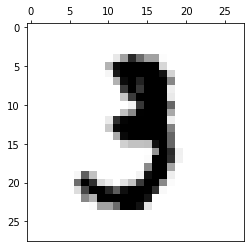

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


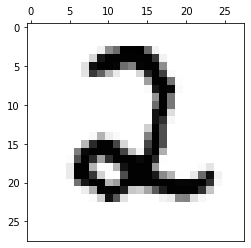

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
mnist_x, mnist_y = read_mnist("training", path="./handwritten_mnist/")
print(np.shape(mnist_x), np.shape(mnist_y))
pyplot_mnist(mnist_x[10]).show()  # image (=x-factor) of 10th data
print(mnist_y[10])  # label of 10th image data
pyplot_mnist(mnist_x[378]).show() # image (=x-factor) of 378th data
print(mnist_y[378]) # label of 378th image data

(10000, 28, 28) (10000, 10)


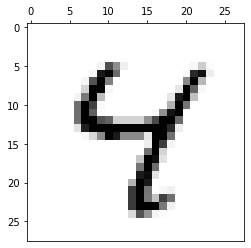

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


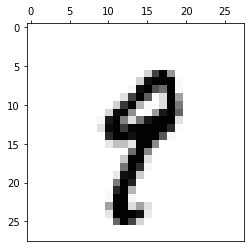

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
mnist_x, mnist_y = read_mnist("testing", path="./handwritten_mnist/")
print(np.shape(mnist_x), np.shape(mnist_y))
pyplot_mnist(mnist_x[6]).show()  # image (=x-factor) of 6th data
print(mnist_y[6])  # label of 10th image data
pyplot_mnist(mnist_x[78]).show() # image (=x-factor) of 78th data
print(mnist_y[78]) # label of 78th image data

In [ ]:
# Frist Trial : Single-Layered Neural Networks with SGD
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import random
tf.set_random_seed(777)  # for reproducibility

# Before running this code, unzip the file, "handwritten_mnist.zip".
mnist_x, mnist_y = read_mnist("training", path="./handwritten_mnist/", one_hot=True)

nb_classes = 10
n_samples = len(mnist_y)
train_x_data = np.array(mnist_x).reshape(n_samples, 28*28)
train_y_data = np.array(mnist_y)
print(np.shape(train_x_data), np.shape(train_y_data))

(60000, 784) (60000, 10)


In [ ]:
# parameters
num_epochs = 200
batch_size = 100
steps_per_epoch = int(n_samples / batch_size) # = 60000/100 = 600

# create dataset objects from the arrays
dx = tf.data.Dataset.from_tensor_slices(train_x_data)
dy = tf.data.Dataset.from_tensor_slices(train_y_data)
# zip the two datasets together
dmnist = tf.data.Dataset.zip((dx, dy)).shuffle(n_samples).batch(batch_size)
iterator = dmnist.make_initializable_iterator()
next_element = iterator.get_next()

In [ ]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y)
)
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.2/batch_size).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [ ]:
W_ = tf.placeholder(tf.float64, shape=[784, nb_classes])
b_ = tf.placeholder(tf.float64, shape=[nb_classes])
# execute the training graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs+1):
        avg_cost = 0
        sess.run(iterator.initializer)
        for i in range(steps_per_epoch):
            x_batch, y_batch = sess.run(next_element)
            _, cost_val, W_, b_ = sess.run([train_op, cost, W, b], 
                                           feed_dict={X: x_batch, Y: y_batch})
            avg_cost += cost_val / steps_per_epoch
        if (epoch % 10 == 0):
            print("Epoch: {:04d}, Cost: {:.9f}".format(epoch, avg_cost))
    print("Learning finished")

Epoch: 0000, Cost: 275.261486753
Epoch: 0010, Cost: 52.010497991
Epoch: 0020, Cost: 35.174429001
Epoch: 0030, Cost: 28.594770227
Epoch: 0040, Cost: 26.070793835
Epoch: 0050, Cost: 24.125044247
Epoch: 0060, Cost: 23.440626925
Epoch: 0070, Cost: 22.132399675
Epoch: 0080, Cost: 21.800946759
Epoch: 0090, Cost: 21.094545427
Epoch: 0100, Cost: 21.531484512
Epoch: 0110, Cost: 21.901188555
Epoch: 0120, Cost: 21.536084482
Epoch: 0130, Cost: 20.955330296
Epoch: 0140, Cost: 20.490106178
Epoch: 0150, Cost: 20.766121144
Epoch: 0160, Cost: 20.313237812
Epoch: 0170, Cost: 20.341210680
Epoch: 0180, Cost: 20.449713660
Epoch: 0190, Cost: 19.941444467
Epoch: 0200, Cost: 20.276840176
Learning finished


Accuracy:  0.8706
Expected = 8 vs. Prediction = [8]


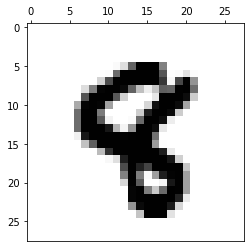

In [ ]:
# Now, read the test dataset (deafult: one_hot=True)
mnist_x, mnist_y = read_mnist("testing", path="./handwritten_mnist/")
n_test_size = len(mnist_y)
test_x = np.array(mnist_x).reshape(n_test_size, 28*28)
test_y = np.array(mnist_y)
with tf.Session() as sess:
    acc = sess.run(accuracy, feed_dict={X: test_x, Y: test_y, W: W_, b: b_})
    print("Accuracy: ", acc)

    # Get one and predict
    r = random.randint(0, n_test_size - 1)
    ys_label = sess.run(tf.argmax(test_y[r]))
    yp_label = sess.run(tf.argmax(hypothesis, 1), feed_dict={X: test_x[r:r+1], W: W_, b: b_})
    print("Expected = {} vs. Prediction = {}".format(ys_label, yp_label))
    pyplot_mnist(mnist_x[r]).show() 

In [ ]:
# Second Trial : Single-Layered Neural Networks with Adam Optimizer
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import random
tf.set_random_seed(777)  # for reproducibility

# Before running this code, unzip the file, "handwritten_mnist.zip".
mnist_x, mnist_y = read_mnist("training", path="./handwritten_mnist/", one_hot=True)

nb_classes = 10
n_samples = len(mnist_y)
train_x_data = np.array(mnist_x).reshape(n_samples, 28*28)
train_y_data = np.array(mnist_y)

# parameters
num_epochs = 200
batch_size = 100
steps_per_epoch = int(n_samples / batch_size) # = 60000/100 = 600

# create dataset objects from the arrays
dx = tf.data.Dataset.from_tensor_slices(train_x_data)
dy = tf.data.Dataset.from_tensor_slices(train_y_data)
# zip the two datasets together
dmnist = tf.data.Dataset.zip((dx, dy)).shuffle(n_samples).batch(batch_size)
iterator = dmnist.make_initializable_iterator()
next_element = iterator.get_next()

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

In [ ]:
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y)
)
train_op = tf.train.AdamOptimizer(learning_rate=0.2/batch_size).minimize(cost)

In [ ]:
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

W_ = tf.placeholder(tf.float64, shape=[784, nb_classes])
b_ = tf.placeholder(tf.float64, shape=[nb_classes])
# execute the training graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs+1):
        avg_cost = 0
        sess.run(iterator.initializer)
        for i in range(steps_per_epoch):
            x_batch, y_batch = sess.run(next_element)
            _, cost_val, W_, b_ = sess.run([train_op, cost, W, b], 
                                           feed_dict={X: x_batch, Y: y_batch})
            avg_cost += cost_val / steps_per_epoch
        if (epoch % 10 == 0):
            print("Epoch: {:04d}, Cost: {:.9f}".format(epoch, avg_cost))
    print("Learning finished")

Epoch: 0000, Cost: 814.842047933
Epoch: 0010, Cost: 67.763306995
Epoch: 0020, Cost: 41.383505552
Epoch: 0030, Cost: 29.028588975
Epoch: 0040, Cost: 21.500889502
Epoch: 0050, Cost: 16.553330040
Epoch: 0060, Cost: 13.174884391
Epoch: 0070, Cost: 10.813305591
Epoch: 0080, Cost: 9.255839623
Epoch: 0090, Cost: 8.107487504
Epoch: 0100, Cost: 7.346387689
Epoch: 0110, Cost: 6.763804842
Epoch: 0120, Cost: 6.387038923
Epoch: 0130, Cost: 6.335854810
Epoch: 0140, Cost: 6.034455495
Epoch: 0150, Cost: 5.835676469
Epoch: 0160, Cost: 5.868611160
Epoch: 0170, Cost: 5.738139691
Epoch: 0180, Cost: 5.762176305
Epoch: 0190, Cost: 5.703842817
Epoch: 0200, Cost: 5.654807066
Learning finished


Accuracy:  0.8905
Expected = 9 vs. Prediction = [9]


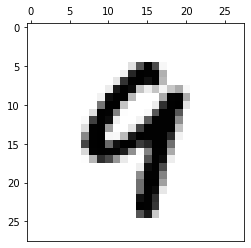

In [ ]:
# Now, read the test dataset (deafult: one_hot=True)
mnist_x, mnist_y = read_mnist("testing", path="./handwritten_mnist/")
n_test_size = len(mnist_y)
test_x = np.array(mnist_x).reshape(n_test_size, 28*28)
test_y = np.array(mnist_y)
with tf.Session() as sess:
    acc = sess.run(accuracy, feed_dict={X: test_x, Y: test_y, W: W_, b: b_})
    print("Accuracy: ", acc)

    # Get one and predict
    r = random.randint(0, n_test_size - 1)
    ys_label = sess.run(tf.argmax(test_y[r]))
    yp_label = sess.run(tf.argmax(hypothesis, 1), feed_dict={X: test_x[r:r+1], W: W_, b: b_})
    print("Expected = {} vs. Prediction = {}".format(ys_label, yp_label))
    pyplot_mnist(mnist_x[r]).show() 

In [ ]:
# Third Trial : Multiple-Layered Neural Networks with ReLU
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import random
tf.set_random_seed(777)  # for reproducibility

# Before running this code, unzip the file, "handwritten_mnist.zip".
mnist_x, mnist_y = read_mnist("training", path="./handwritten_mnist/", one_hot=True)

nb_classes = 10
n_samples = len(mnist_y)
train_x_data = np.array(mnist_x).reshape(n_samples, 28*28)
train_y_data = np.array(mnist_y)

# parameters
num_epochs = 400
batch_size = 100
steps_per_epoch = int(n_samples / batch_size) # = 60000/100 = 600

# create dataset objects from the arrays
dx = tf.data.Dataset.from_tensor_slices(train_x_data)
dy = tf.data.Dataset.from_tensor_slices(train_y_data)
# zip the two datasets together
dmnist = tf.data.Dataset.zip((dx, dy)).shuffle(n_samples).batch(batch_size)
iterator = dmnist.make_initializable_iterator()
next_element = iterator.get_next()

In [ ]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
# weights & bias for the first layer
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
# weights & bias for the second layer
W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
# weights & bias for the third layer
W3 = tf.Variable(tf.random_normal([256, nb_classes]))
b3 = tf.Variable(tf.random_normal([nb_classes]))
logits = tf.matmul(L2, W3) + b3
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(logits)

In [ ]:
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y)
)
train_op = tf.train.AdamOptimizer(learning_rate=0.1/batch_size).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

W_1 = tf.placeholder(tf.float64, shape=[784, 256])
b_1 = tf.placeholder(tf.float64, shape=[256])
W_2 = tf.placeholder(tf.float64, shape=[256, 256])
b_2 = tf.placeholder(tf.float64, shape=[256])
W_3 = tf.placeholder(tf.float64, shape=[256, nb_classes])
b_3 = tf.placeholder(tf.float64, shape=[nb_classes])

In [ ]:
# execute the training graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs+1):
        avg_cost = 0
        sess.run(iterator.initializer)
        for i in range(steps_per_epoch):
            x_batch, y_batch = sess.run(next_element)
            _, cost_val, W_1, b_1, W_2, b_2, W_3, b_3 = \
                 sess.run([train_op, cost, W1, b1, W2, b2, W3, b3], 
                          feed_dict={X: x_batch, Y: y_batch})
            avg_cost += cost_val / steps_per_epoch
        if (epoch % 20 == 0):
            print("Epoch: {:04d}, Cost: {:.9f}".format(epoch, avg_cost))
    print("Learning finished")

Epoch: 0000, Cost: 37268.005496012
Epoch: 0020, Cost: 94.834201633
Epoch: 0040, Cost: 45.661728745
Epoch: 0060, Cost: 40.150197595
Epoch: 0080, Cost: 29.565721994
Epoch: 0100, Cost: 17.425654542
Epoch: 0120, Cost: 12.677509439
Epoch: 0140, Cost: 16.802116009
Epoch: 0160, Cost: 17.862493631
Epoch: 0180, Cost: 14.080497287
Epoch: 0200, Cost: 16.031023057
Epoch: 0220, Cost: 7.327607382
Epoch: 0240, Cost: 11.388577087
Epoch: 0260, Cost: 18.867658506
Epoch: 0280, Cost: 7.366231809
Epoch: 0300, Cost: 12.718189478
Epoch: 0320, Cost: 6.405912297
Epoch: 0340, Cost: 11.609647369
Epoch: 0360, Cost: 8.018997276
Epoch: 0380, Cost: 6.673022726
Epoch: 0400, Cost: 3.507203134
Learning finished


Accuracy:  0.9765
Expected = 1 vs. Prediction = [1]


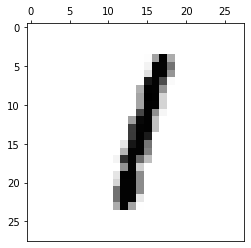

In [ ]:
# Now, read the test dataset (deafult: one_hot=True)
mnist_x, mnist_y = read_mnist("testing", path="./handwritten_mnist/")
n_test_size = len(mnist_y)
test_x = np.array(mnist_x).reshape(n_test_size, 28*28)
test_y = np.array(mnist_y)
with tf.Session() as sess:
    acc = sess.run(accuracy, feed_dict={X: test_x, Y: test_y, \
                  W1: W_1, b1: b_1, W2: W_2, b2: b_2, W3: W_3, b3: b_3})
    print("Accuracy: ", acc)

    # Get one and predict
    r = random.randint(0, n_test_size - 1)
    ys_label = sess.run(tf.argmax(test_y[r]))
    yp_label = sess.run(tf.argmax(hypothesis, 1), feed_dict={X: test_x[r:r+1], \
                        W1: W_1, b1: b_1, W2: W_2, b2: b_2, W3: W_3, b3: b_3})
    print("Expected = {} vs. Prediction = {}".format(ys_label, yp_label))
    pyplot_mnist(mnist_x[r]).show() 

In [ ]:
# Fourth Trial : Multiple-Layered Neural Networks with He Initialization
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import random
tf.set_random_seed(777)  # for reproducibility

# Before running this code, unzip the file, "handwritten_mnist.zip".
mnist_x, mnist_y = read_mnist("training", path="./handwritten_mnist/", one_hot=True)

nb_classes = 10
n_samples = len(mnist_y)
train_x_data = np.array(mnist_x).reshape(n_samples, 28*28)
train_y_data = np.array(mnist_y)

# parameters
batch_size = 100
steps_per_epoch = int(n_samples / batch_size) # = 60000/100 = 600

# create dataset objects from the arrays
dx = tf.data.Dataset.from_tensor_slices(train_x_data)
dy = tf.data.Dataset.from_tensor_slices(train_y_data)
# zip the two datasets together
dmnist = tf.data.Dataset.zip((dx, dy)).shuffle(n_samples).batch(batch_size)
iterator = dmnist.make_initializable_iterator()
next_element = iterator.get_next()

In [ ]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
# weights & bias for the first layer
_initializer = tf.initializers.he_normal()
W1 = tf.Variable(_initializer(shape=[784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
# weights & bias for the second layer
W2 = tf.Variable(_initializer(shape=[256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
# weights & bias for the third layer
W3 = tf.Variable(_initializer(shape=[256, nb_classes]))
b3 = tf.Variable(tf.random_normal([nb_classes]))
logits = tf.matmul(L2, W3) + b3

In [ ]:
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(logits)
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y)
)
train_op = tf.train.AdamOptimizer(learning_rate=0.1/batch_size).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

W_1 = tf.placeholder(tf.float64, shape=[784, 256])
b_1 = tf.placeholder(tf.float64, shape=[256])
W_2 = tf.placeholder(tf.float64, shape=[256, 256])
b_2 = tf.placeholder(tf.float64, shape=[256])
W_3 = tf.placeholder(tf.float64, shape=[256, nb_classes])
b_3 = tf.placeholder(tf.float64, shape=[nb_classes])

In [ ]:
# execute the training graph
num_epochs = 120
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs+1):
        avg_cost = 0
        sess.run(iterator.initializer)
        for i in range(steps_per_epoch):
            x_batch, y_batch = sess.run(next_element)
            _, cost_val, W_1, b_1, W_2, b_2, W_3, b_3 = \
                 sess.run([train_op, cost, W1, b1, W2, b2, W3, b3], 
                          feed_dict={X: x_batch, Y: y_batch})
            avg_cost += cost_val / steps_per_epoch
        if (epoch % 10 == 0):
            print("Epoch: {:04d}, Cost: {:.9f}".format(epoch, avg_cost))
    print("Learning finished")

Epoch: 0000, Cost: 3.406544462
Epoch: 0010, Cost: 0.095540667
Epoch: 0020, Cost: 0.071281566
Epoch: 0030, Cost: 0.052337678
Epoch: 0040, Cost: 0.033092599
Epoch: 0050, Cost: 0.040311168
Epoch: 0060, Cost: 0.027596472
Epoch: 0070, Cost: 0.027209901
Epoch: 0080, Cost: 0.028952341
Epoch: 0090, Cost: 0.038173091
Epoch: 0100, Cost: 0.018489076
Epoch: 0110, Cost: 0.019177939
Epoch: 0120, Cost: 0.018481401
Learning finished


Accuracy:  0.9763
Expected = 9 vs. Prediction = [9]


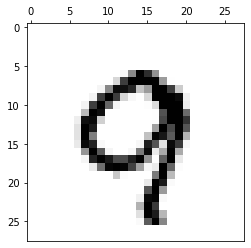

In [ ]:
# Now, read the test dataset (deafult: one_hot=True)
mnist_x, mnist_y = read_mnist("testing", path="./handwritten_mnist/")
n_test_size = len(mnist_y)
test_x = np.array(mnist_x).reshape(n_test_size, 28*28)
test_y = np.array(mnist_y)
with tf.Session() as sess:
    acc = sess.run(accuracy, feed_dict={X: test_x, Y: test_y, \
                  W1: W_1, b1: b_1, W2: W_2, b2: b_2, W3: W_3, b3: b_3})
    print("Accuracy: ", acc)

    # Get one and predict
    r = random.randint(0, n_test_size - 1)
    ys_label = sess.run(tf.argmax(test_y[r]))
    yp_label = sess.run(tf.argmax(hypothesis, 1), feed_dict={X: test_x[r:r+1], \
                        W1: W_1, b1: b_1, W2: W_2, b2: b_2, W3: W_3, b3: b_3})
    print("Expected = {} vs. Prediction = {}".format(ys_label, yp_label))
    pyplot_mnist(mnist_x[r]).show() 

In [ ]:
# Fifth Trial : Deep Neural Networks with 4 hidden layers
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import random
tf.set_random_seed(777)  # for reproducibility

# Before running this code, unzip the file, "handwritten_mnist.zip".
mnist_x, mnist_y = read_mnist("training", path="./handwritten_mnist/", one_hot=True)

nb_classes = 10
n_samples = len(mnist_y)
train_x_data = np.array(mnist_x).reshape(n_samples, 28*28)
train_y_data = np.array(mnist_y)

# parameters
batch_size = 100
steps_per_epoch = int(n_samples / batch_size) # = 60000/100 = 600

# create dataset objects from the arrays
dx = tf.data.Dataset.from_tensor_slices(train_x_data)
dy = tf.data.Dataset.from_tensor_slices(train_y_data)
# zip the two datasets together
dmnist = tf.data.Dataset.zip((dx, dy)).shuffle(n_samples).batch(batch_size)
iterator = dmnist.make_initializable_iterator()
next_element = iterator.get_next()

In [ ]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
_initializer = tf.initializers.he_normal()
# weights & bias for the first layer
W1 = tf.Variable(_initializer(shape=[784, 512]))
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
# weights & bias for the second layer
W2 = tf.Variable(_initializer(shape=[512, 512]))
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
# weights & bias for the third layer
W3 = tf.Variable(_initializer(shape=[512, 512]))
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
# weights & bias for the fourth layer
W4 = tf.Variable(_initializer(shape=[512, 256]))
b4 = tf.Variable(tf.random_normal([256]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
# weights & bias for the final layer
W5 = tf.Variable(_initializer(shape=[256, nb_classes]))
b5 = tf.Variable(tf.random_normal([nb_classes]))
logits = tf.matmul(L4, W5) + b5

In [ ]:
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(logits)
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y)
)
train_op = tf.train.AdamOptimizer(learning_rate=0.1/batch_size).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

W_1 = tf.placeholder(tf.float64, shape=[784, 512])
b_1 = tf.placeholder(tf.float64, shape=[512])
W_2 = tf.placeholder(tf.float64, shape=[512, 512])
b_2 = tf.placeholder(tf.float64, shape=[512])
W_3 = tf.placeholder(tf.float64, shape=[512, 512])
b_3 = tf.placeholder(tf.float64, shape=[512])
W_4 = tf.placeholder(tf.float64, shape=[512, 256])
b_4 = tf.placeholder(tf.float64, shape=[256])
W_5 = tf.placeholder(tf.float64, shape=[256, nb_classes])
b_5 = tf.placeholder(tf.float64, shape=[nb_classes])

In [ ]:
# execute the training graph
num_epochs = 70
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs+1):
        avg_cost = 0
        sess.run(iterator.initializer)
        for i in range(steps_per_epoch):
            x_batch, y_batch = sess.run(next_element)
            _, cost_val, W_1, b_1, W_2, b_2, W_3, b_3, W_4, b_4, W_5, b_5  = \
                 sess.run([train_op, cost, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5], 
                          feed_dict={X: x_batch, Y: y_batch})
            avg_cost += cost_val / steps_per_epoch
        if (epoch % 5 == 0):
            print("Epoch: {:04d}, Cost: {:.9f}".format(epoch, avg_cost))
    print("Learning finished")

Epoch: 0000, Cost: 2.990053232
Epoch: 0005, Cost: 0.103085346
Epoch: 0010, Cost: 0.062253209
Epoch: 0015, Cost: 0.042409414
Epoch: 0020, Cost: 0.040005979
Epoch: 0025, Cost: 0.029145368
Epoch: 0030, Cost: 0.026611270
Epoch: 0035, Cost: 0.021987840
Epoch: 0040, Cost: 0.021983832
Epoch: 0045, Cost: 0.024545168
Epoch: 0050, Cost: 0.025784192
Epoch: 0055, Cost: 0.018209347
Epoch: 0060, Cost: 0.014277480
Epoch: 0065, Cost: 0.043672677
Epoch: 0070, Cost: 0.018472921
Learning finished


Accuracy:  0.9792
Expected = 4 vs. Prediction = [4]


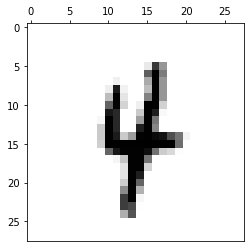

In [ ]:
# Now, read the test dataset (deafult: one_hot=True)
mnist_x, mnist_y = read_mnist("testing", path="./handwritten_mnist/")
n_test_size = len(mnist_y)
test_x = np.array(mnist_x).reshape(n_test_size, 28*28)
test_y = np.array(mnist_y)
with tf.Session() as sess:
    acc = sess.run(accuracy, feed_dict={X: test_x, Y: test_y, \
                  W1: W_1, b1: b_1, W2: W_2, b2: b_2, W3: W_3, b3: b_3, \
                  W4: W_4, b4: b_4, W5: W_5, b5: b_5})
    print("Accuracy: ", acc)

    # Get one and predict
    r = random.randint(0, n_test_size - 1)
    ys_label = sess.run(tf.argmax(test_y[r]))
    yp_label = sess.run(tf.argmax(hypothesis, 1), feed_dict={X: test_x[r:r+1], \
                W1: W_1, b1: b_1, W2: W_2, b2: b_2, W3: W_3, b3: b_3, \
                W4: W_4, b4: b_4, W5: W_5, b5: b_5})
    print("Expected = {} vs. Prediction = {}".format(ys_label, yp_label))
    pyplot_mnist(mnist_x[r]).show() 

In [ ]:
# Sixth Trial : Deep Neural Networks with drop-out
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import random
tf.set_random_seed(777)  # for reproducibility

# Before running this code, unzip the file, "handwritten_mnist.zip".
mnist_x, mnist_y = read_mnist("training", path="./handwritten_mnist/", one_hot=True)

nb_classes = 10
n_samples = len(mnist_y)
train_x_data = np.array(mnist_x).reshape(n_samples, 28*28)
train_y_data = np.array(mnist_y)

# parameters
batch_size = 100
steps_per_epoch = int(n_samples / batch_size) # = 60000/100 = 600

# create dataset objects from the arrays
dx = tf.data.Dataset.from_tensor_slices(train_x_data)
dy = tf.data.Dataset.from_tensor_slices(train_y_data)
# zip the two datasets together
dmnist = tf.data.Dataset.zip((dx, dy)).shuffle(n_samples).batch(batch_size)
iterator = dmnist.make_initializable_iterator()
next_element = iterator.get_next()

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


In [ ]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
_initializer = tf.initializers.he_normal()
keep_rate = tf.placeholder(tf.float32)
# weights & bias for the first layer
W1 = tf.Variable(_initializer(shape=[784, 512]))
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob = keep_rate) # tf.compat.v1.nn.dropout
# weights & bias for the second layer
W2 = tf.Variable(_initializer(shape=[512, 512]))
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob = keep_rate)
# weights & bias for the third layer
W3 = tf.Variable(_initializer(shape=[512, 512]))
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob = keep_rate)
# weights & bias for the fourth layer
W4 = tf.Variable(_initializer(shape=[512, 256]))
b4 = tf.Variable(tf.random_normal([256]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob = keep_rate)
# weights & bias for the final layer
W5 = tf.Variable(_initializer(shape=[256, nb_classes]))
b5 = tf.Variable(tf.random_normal([nb_classes]))
logits = tf.matmul(L4, W5) + b5

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(logits)
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y)
)
train_op = tf.train.AdamOptimizer(learning_rate=0.1/batch_size).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

W_1 = tf.placeholder(tf.float64, shape=[784, 512])
b_1 = tf.placeholder(tf.float64, shape=[512])
W_2 = tf.placeholder(tf.float64, shape=[512, 512])
b_2 = tf.placeholder(tf.float64, shape=[512])
W_3 = tf.placeholder(tf.float64, shape=[512, 512])
b_3 = tf.placeholder(tf.float64, shape=[512])
W_4 = tf.placeholder(tf.float64, shape=[512, 256])
b_4 = tf.placeholder(tf.float64, shape=[256])
W_5 = tf.placeholder(tf.float64, shape=[256, nb_classes])
b_5 = tf.placeholder(tf.float64, shape=[nb_classes])

In [ ]:
# execute the training graph
num_epochs = 30
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs+1):
        avg_cost = 0
        sess.run(iterator.initializer)
        for i in range(steps_per_epoch):
            x_batch, y_batch = sess.run(next_element)
            _, cost_val, W_1, b_1, W_2, b_2, W_3, b_3, W_4, b_4, W_5, b_5  = \
                 sess.run([train_op, cost, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5], 
                          feed_dict={X: x_batch, Y: y_batch, keep_rate: 0.8})
            avg_cost += cost_val / steps_per_epoch
        if (epoch % 2 == 0):
            print("Epoch: {:04d}, Cost: {:.9f}".format(epoch, avg_cost))
    print("Learning finished")

Epoch: 0000, Cost: 4.748246956
Epoch: 0002, Cost: 0.354102166
Epoch: 0004, Cost: 0.227404836
Epoch: 0006, Cost: 0.181953630
Epoch: 0008, Cost: 0.156567458
Epoch: 0010, Cost: 0.142558988
Epoch: 0012, Cost: 0.134284319
Epoch: 0014, Cost: 0.126025517
Epoch: 0016, Cost: 0.120011920
Epoch: 0018, Cost: 0.106885702
Epoch: 0020, Cost: 0.103177606
Epoch: 0022, Cost: 0.109658469
Epoch: 0024, Cost: 0.102480038
Epoch: 0026, Cost: 0.107972207
Epoch: 0028, Cost: 0.108433091
Epoch: 0030, Cost: 0.082043195
Learning finished


Accuracy:  0.9805
Expected = 3 vs. Prediction = [3]


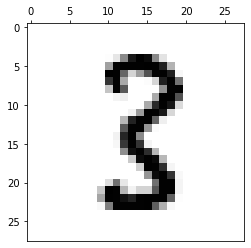

In [ ]:
# Now, read the test dataset (deafult: one_hot=True)
mnist_x, mnist_y = read_mnist("testing", path="./handwritten_mnist/")
n_test_size = len(mnist_y)
test_x = np.array(mnist_x).reshape(n_test_size, 28*28)
test_y = np.array(mnist_y)
with tf.Session() as sess:
    acc = sess.run(accuracy, feed_dict={X: test_x, Y: test_y, keep_rate: 1.0, \
                  W1: W_1, b1: b_1, W2: W_2, b2: b_2, W3: W_3, b3: b_3, \
                  W4: W_4, b4: b_4, W5: W_5, b5: b_5})
    print("Accuracy: ", acc)

    # Get one and predict
    r = random.randint(0, n_test_size - 1)
    ys_label = sess.run(tf.argmax(test_y[r]))
    yp_label = sess.run(tf.argmax(hypothesis, 1), feed_dict={X: test_x[r:r+1], \
                W1: W_1, b1: b_1, W2: W_2, b2: b_2, W3: W_3, b3: b_3, \
                W4: W_4, b4: b_4, W5: W_5, b5: b_5, keep_rate: 1.0})
    print("Expected = {} vs. Prediction = {}".format(ys_label, yp_label))
    pyplot_mnist(mnist_x[r]).show() 